In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# função para traçar reta
def coord(w0,w1,w2,x1):
  if w2 != 0:
    return (-w0-w1*x1)/w2
  else:
    return 2000 # Inf

In [3]:
# Dataset porta lógica AND
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y = np.array([-1,-1,-1,1])

In [4]:
# confere entrada - saída
X[0:4], y[0:4]

(array([[-1, -1],
        [-1,  1],
        [ 1, -1],
        [ 1,  1]]),
 array([-1, -1, -1,  1]))

In [5]:
# base
# classe Perceptron

class Perceptron(object):

    def __init__(self, eta=0.1, epocas=50):
        self.eta = eta
        self.epocas = epocas
        self.w_ = np.random.rand(1 + X.shape[1]) - 0.5

    def treina(self, X, y):
        self.erros_ = []
        for _ in range(self.epocas):
            erros = 0
            for xi, target in zip(X, y):

                # atualizacao PERCEPTRON classico
                # atualiza = self.eta * (target - self.predict(xi))

                # atualizacao abordagem ADALINE
                atualiza = self.eta * (target - self.somat(xi))

                self.w_[0] +=  atualiza * 1
                self.w_[1:] +=  atualiza * xi

                # erros PERCEPTRON
                # erros += int(atualiza != 0.0)

                # erros ADALINE
                erros += (target - self.somat(xi))

            self.erros_.append(erros)
        return self

    def somat(self, X):
        return self.w_[0] + np.dot(X, self.w_[1:])

    def predict(self, X): 
        return np.where(self.somat(X) >= 0.0, 1, -1)

In [6]:
rna = Perceptron(epocas=50, eta=0.1)

Pesos iniciais: [-0.35012548 -0.24626289 -0.15687421]


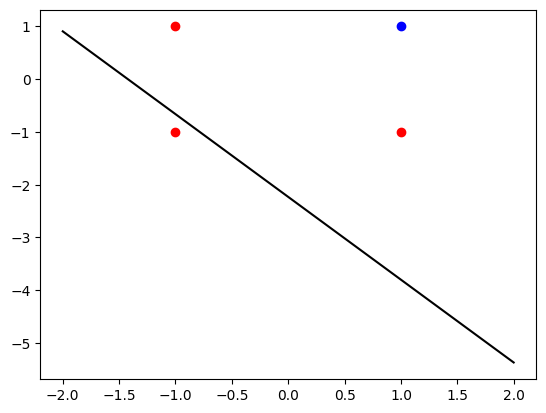

In [7]:
print(f'Pesos iniciais: {rna.w_}')
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')
plt.show()

In [8]:
rna.treina(X, y)

In [9]:
print(f'Pesos depois treinamento: {rna.w_}')

Pesos depois treinamento: [-0.5         0.52941176  0.55882353]


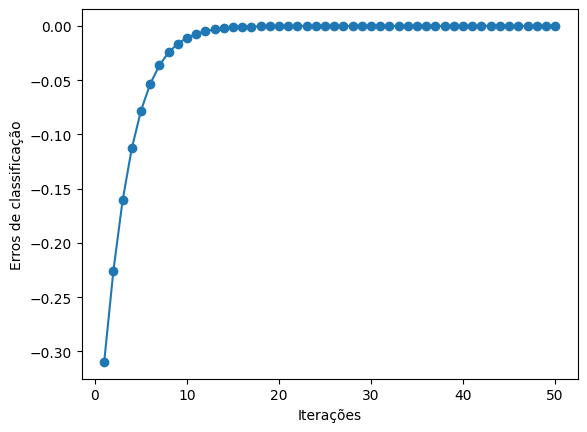

In [10]:
# evolução do erro
plt.plot(range(1, len(rna.erros_)+1), rna.erros_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Erros de classificação')
plt.show()

Pesos depois treinamento [w0, w1,w2]: [-0.5         0.52941176  0.55882353]


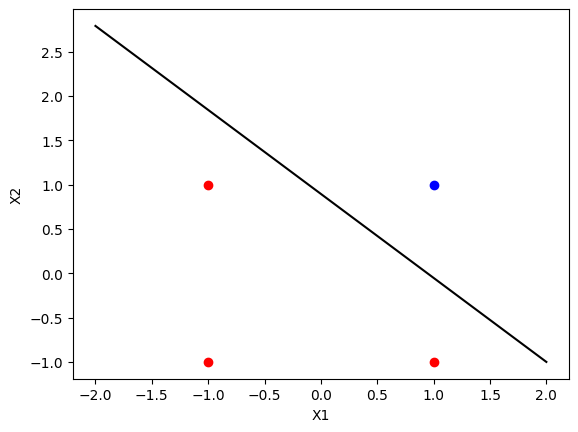

In [11]:
print(f'Pesos depois treinamento [w0, w1,w2]: {rna.w_}')
x1, y1 = X[y==1,0],X[y==1,1]
x0, y0 = X[y==-1,0], X[y==-1,1]

ylim = [min(min(x1) , min(x0))-1, max(max(x0) , max(x1))+1]
x = np.linspace(ylim[0], ylim[1], 2)
plt.scatter(x1,y1, color='blue')
plt.scatter(x0,y0,color='red')
plt.plot(ylim,coord(rna.w_[0],rna.w_[1],rna.w_[2], x),color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [12]:
rna.erros_

[-0.3096371816636174,
 -0.22558047872573594,
 -0.16080815893824785,
 -0.11274883374258471,
 -0.07802464097574768,
 -0.053424973429805456,
 -0.03626113891759364,
 -0.024429931138790995,
 -0.016355015206392376,
 -0.010889165082947128,
 -0.007215198479419316,
 -0.0047605039714374575,
 -0.0031290150313175724,
 -0.002049646173479802,
 -0.0013384656202412026,
 -0.0008715902151175126,
 -0.0005661050986417449,
 -0.0003668176865624373,
 -0.00023716429288445084,
 -0.00015302482089873948,
 -9.854794544483791e-05,
 -6.335181433236858e-05,
 -4.0657727002013644e-05,
 -2.605201851990646e-05,
 -1.6668295840238656e-05,
 -1.06494218714559e-05,
 -6.794789397135403e-06,
 -4.329804565883499e-06,
 -2.7556718872334685e-06,
 -1.7517653293497304e-06,
 -1.1123303775839588e-06,
 -7.055365670582958e-07,
 -4.4704359458691556e-07,
 -2.829698215744969e-07,
 -1.7893866566254246e-07,
 -1.1304589819793875e-07,
 -7.135157498172617e-08,
 -4.499466688123732e-08,
 -2.834894385905784e-08,
 -1.7845958932838357e-08,
 -1.12247